In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style('whitegrid')

In [70]:
data_path='hms-harmful-brain-activity-classification'
test_eeg_path='train_eegs'

eeg=pd.read_parquet(f'{data_path}/{test_eeg_path}/1628180742.parquet')

In [71]:
eeg.head()

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
0,-80.519997,-70.540001,-80.110001,-108.750000,-120.330002,-88.620003,-101.750000,-104.489998,-99.129997,-90.389999,-97.040001,-77.989998,-88.830002,-112.120003,-108.110001,-95.949997,-98.360001,-121.730003,-106.449997,7.920000
1,-80.449997,-70.330002,-81.760002,-107.669998,-120.769997,-90.820000,-104.260002,-99.730003,-99.070000,-92.290001,-96.019997,-84.500000,-84.989998,-115.610001,-103.860001,-97.470001,-89.290001,-115.500000,-102.059998,29.219999
2,-80.209999,-75.870003,-82.050003,-106.010002,-117.500000,-87.489998,-99.589996,-96.820000,-119.680000,-99.360001,-91.110001,-99.440002,-104.589996,-127.529999,-113.349998,-95.870003,-96.019997,-123.879997,-105.790001,45.740002
3,-84.709999,-75.339996,-87.480003,-108.970001,-121.410004,-94.750000,-105.370003,-100.279999,-113.839996,-102.059998,-95.040001,-99.230003,-101.220001,-125.769997,-111.889999,-97.459999,-97.180000,-128.940002,-109.889999,83.870003
4,-90.570000,-80.790001,-93.000000,-113.870003,-129.960007,-102.860001,-118.599998,-101.099998,-107.660004,-102.339996,-98.510002,-95.300003,-88.930000,-115.639999,-99.800003,-97.500000,-88.730003,-114.849998,-100.250000,97.769997


<Axes: >

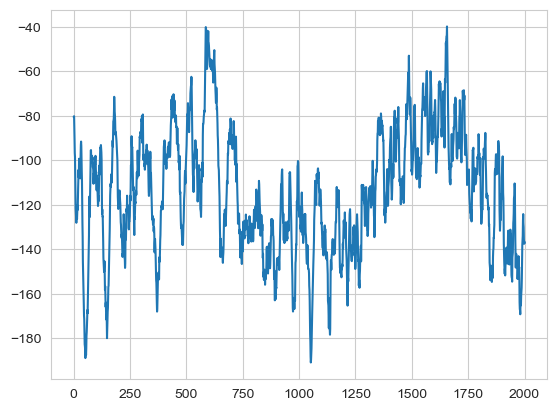

In [22]:
eeg['Fp1'].loc[:200*10].plot()

In [69]:
df_train=pd.read_csv(f'{data_path}/train.csv')
df_train

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106795,351917269,6,12.0,2147388374,6,12.0,4195677307,10351,LRDA,0,0,0,3,0,0
106796,351917269,7,14.0,2147388374,7,14.0,290896675,10351,LRDA,0,0,0,3,0,0
106797,351917269,8,16.0,2147388374,8,16.0,461435451,10351,LRDA,0,0,0,3,0,0
106798,351917269,9,18.0,2147388374,9,18.0,3786213131,10351,LRDA,0,0,0,3,0,0


<Axes: >

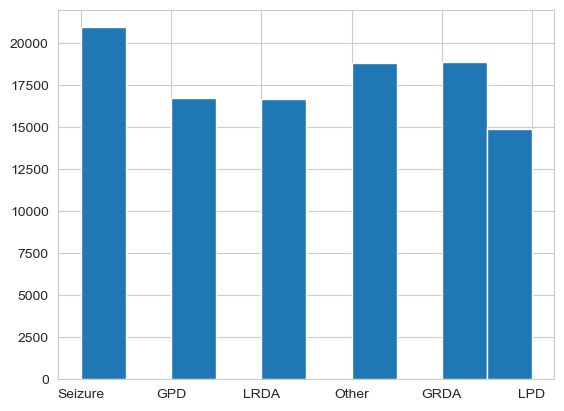

In [67]:

df_train.expert_consensus.hist()


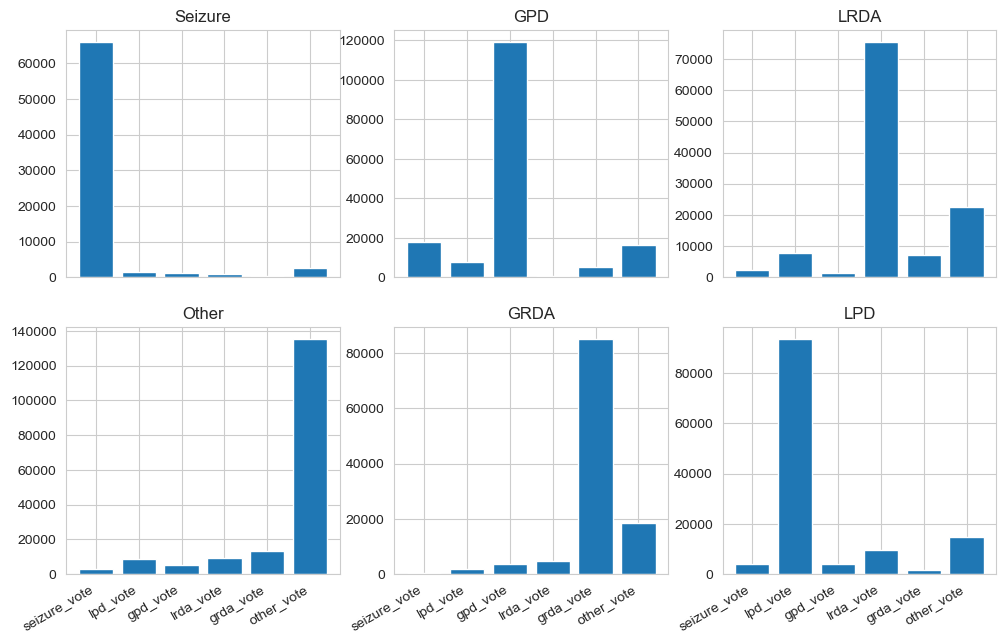

In [48]:
n=6 #num items
nrow=2
ncol=3
exp_consensus=df_train.expert_consensus.unique()
vote=['seizure_vote',	'lpd_vote',	'gpd_vote',	'lrda_vote',	'grda_vote',	'other_vote']

fig,axs=plt.subplots(nrow, ncol, figsize=(4*3, 4*2))
for i, ax in enumerate(fig.axes):
    cur_df=df_train[df_train.expert_consensus==exp_consensus[i]]
    #print(cur_df[vote].sum().keys())
    ax.bar( cur_df[vote].sum().keys(), cur_df[vote].sum().values)
    ax.set_title(exp_consensus[i])
    plt.gcf().autofmt_xdate()
    
plt.show()

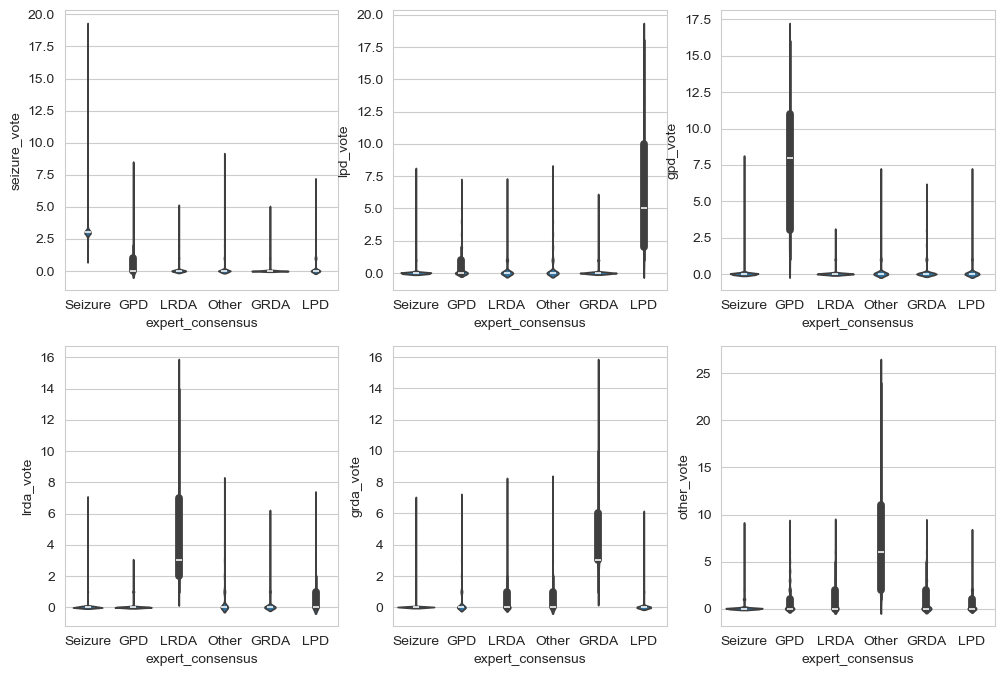

In [53]:
n=6 #num items
nrow=2
ncol=3
exp_consensus=df_train.expert_consensus.unique()
vote=['seizure_vote',	'lpd_vote',	'gpd_vote',	'lrda_vote',	'grda_vote',	'other_vote']

fig,axs=plt.subplots(nrow, ncol, figsize=(4*3, 4*2))
for i, ax in enumerate(fig.axes):
    #cur_df=df_train[df_train.expert_consensus==exp_consensus[i]]
    #print(cur_df[vote].sum().keys())
    #ax.bar( cur_df[vote].sum().keys(), cur_df[vote].sum().values)
    sns.violinplot(data=df_train, y=vote[i],x='expert_consensus', ax=ax)
    #ax.set_title(vote[i])
    #plt.gcf().autofmt_xdate()
    
plt.show()

<Axes: >

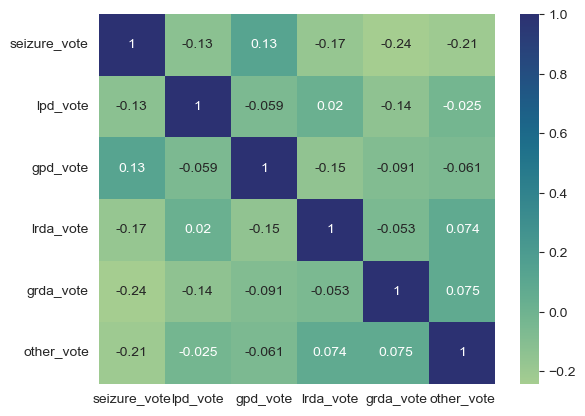

In [66]:
vote=['seizure_vote',	'lpd_vote',	'gpd_vote',	'lrda_vote',	'grda_vote',	'other_vote']
sns.heatmap(df_train[vote].corr(), cmap="crest", annot=True )

other things for data exploration https://www.kaggle.com/competitions/hms-harmful-brain-activity-classification/discussion/467021 . Some of the things the author does, I don't quite understand.

it would also be interesting to do the average power spectrum by concensus https://github.com/HimanshuKhanchandani/Dementia-Detection-Tool (as is done here).